___
# PROJETO 2

## Pedro de la Peña
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\Projeto 2


In [2]:
life = pd.read_excel('Life.xlsx', sep=',')

In [3]:
#limpando NA
life = life.dropna()

___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

#### Para selecionar três anos com formatos de distribuição diferentes, foram comparadas as médias e as medianas, por meio da tabela gerada pelo <i>.describe()<i/>.

##### É importante lembrar que:
##### -Uma média maior que a mediana, há uma assimetria à direita; 
##### -Uma média menor que a mediana gera assimetria à esquerda;
##### -Se a média for igual à mediana, haverá simetria.

#### Assimetria à esquerda

In [18]:
df = pd.DataFrame()
df["2010"] = life.A2010
a2010_1=df["2010"].mean()
a2010_2=df["2010"].median()
print("Média de expectativa de vida de 2010:", a2010_1)
print("Mediana de expectativa de vida de 2010:", a2010_2)

Média de expectativa de vida de 2010: 70.80792039800998
Mediana de expectativa de vida de 2010: 73.4


#### Assimetria à direita

In [17]:
df["1913"] = life.A1913
a1913_1=df["1913"].mean()
a1913_2=df["1913"].median()
print("Média de expectativa de vida de 1913:", a1913_1)
print("Mediana de expectativa de vida de 1913:", a1913_2)

Média de expectativa de vida de 1913: 34.34249356226445
Mediana de expectativa de vida de 1913: 32.1


#### Simétrico (obs: a diferença entre a média e mediana é menor que 0.3 anos)

In [15]:
df["1870"] = life.A1870
a1870_1=df["1870"].mean()
a1870_2=df["1870"].median()
print("Média de expectativa de vida de 1870:", a1870_1)
print("Mediana de expectativa de vida de 1870:", a1870_2)

Média de expectativa de vida de 1870: 31.77398374774605
Mediana de expectativa de vida de 1870: 31.8


___
### Análise Descritiva

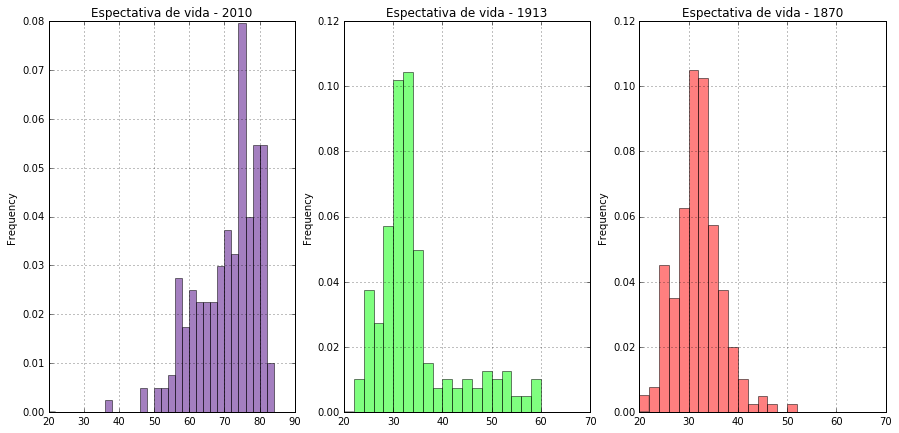

In [66]:
#Histogramas
fig = plt.figure(figsize=(15, 7))
plt.subplot(131)
df["2010"].plot(kind='hist', title= "Espectativa de vida - 2010", grid=True, bins = range(20,85,2),normed=1, alpha = 0.5,color ="indigo")
plt.subplot(132)
df["1913"].plot(kind='hist', title= "Espectativa de vida - 1913", grid=True,bins = range(20,71,2),normed=1, alpha = 0.5,color="lime")
plt.subplot(133)
df["1870"].plot(kind='hist', title= "Espectativa de vida - 1870", grid=True,bins = range(20,71,2),normed=1, alpha = 0.5,color="red")

In [23]:
df["2010"] = life.A2010
df["2010"].describe()

count    201.000000
mean      70.807920
std        8.697194
min       37.000000
25%       64.500000
50%       73.400000
75%       77.600000
max       83.000000
Name: 2010, dtype: float64

In [24]:
df["1913"] = life.A1913
df["1913"].describe()

count    201.000000
mean      34.342494
std        8.085430
min       22.690000
25%       29.848980
50%       32.100000
75%       35.500000
max       58.950000
Name: 1913, dtype: float64

In [25]:
df["1870"] = life.A1870
df["1870"].describe()

count    201.000000
mean      31.773984
std        4.665774
min       19.924000
25%       29.000000
50%       31.800000
75%       34.400000
max       50.860000
Name: 1870, dtype: float64

O aumento na expectativa de vida é claramente percebtível quando comparamos tanto o ano de 1870 quanto o de 1913 ao de 2010. Os 25% menores valores de 2010 correspondem à uma espectativa de vida de 64 anos, enquanto os valores mais aberrantes dos outros anos não chegam a 60 anos.

O desvio padrão dos anos de 2010 e 1913 são próximos, diferindo em apenas 0.6 anos, enquanto a diferença do desvio de 2010 para o de 1870 é de cerca de 4 anos.

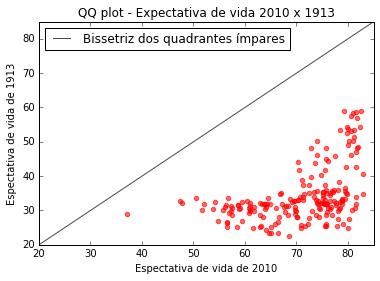

In [45]:
plt.scatter(df["2010"], df["1913"], alpha=0.6, label = '', color = 'red')
plt.plot ([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'Black', alpha = 0.7)
plt.title ('QQ plot - Expectativa de vida 2010 x 1913')
plt.xlim([20,85])
plt.ylim([20,85])
plt.xlabel('Espectativa de vida de 2010')
plt.ylabel('Espectativa de vida de 1913')
plt.legend(loc = 'best')

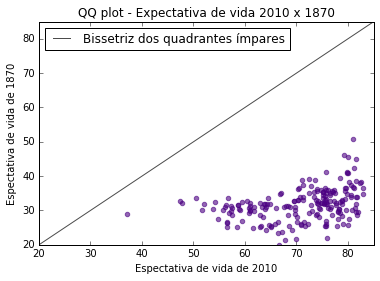

In [46]:
plt.scatter(df["2010"], df["1870"], alpha=0.6, label = '', color = 'indigo')
plt.plot ([20, 85], [20, 85], label = 'Bissetriz dos quadrantes ímpares', color = 'Black', alpha = 0.7)
plt.title ('QQ plot - Expectativa de vida 2010 x 1870')
plt.xlim([20,85])
plt.ylim([20,85])
plt.xlabel('Espectativa de vida de 2010')
plt.ylabel('Espectativa de vida de 1870')
plt.legend(loc = 'best')

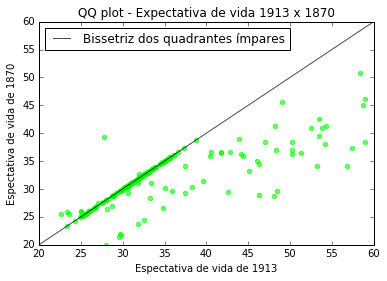

In [44]:
plt.scatter(df["1913"], df["1870"], alpha=0.6, label = '', color = 'lime')
plt.plot ((20, 60), (20, 60), label = 'Bissetriz dos quadrantes ímpares', color = 'Black', alpha = 0.7)
plt.title ('QQ plot - Expectativa de vida 1913 x 1870')
plt.xlim([20,60])
plt.ylim([20,60])
plt.xlabel('Espectativa de vida de 1913')
plt.ylabel('Espectativa de vida de 1870')
plt.legend(loc = 'best')

Pela análise dos QQ plots, é possivel visualizar de maneira clara que a expectativa de vida foi muito alterada quando comparamos os anos de 2010 com os outros dois. A correlação entre os anos de 2010 e 1913, assim como de 2010 e 1870 é muito menor que a correlação entre os anos de 1870 e 1913.

### Aderência de um modelo probabilístico normal aos dados

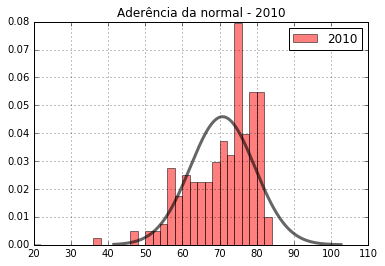

In [114]:
x = sorted(stats.norm.rvs(size = 10000, loc = 70.807920, scale = 8.697194))
plt.plot(x, stats.norm.pdf(x, loc = 70.807920, scale = 8.697194), lw = 3, alpha = 0.6, color = 'Black')
plt.title ('Aderência da normal - 2010')
df["2010"].hist(bins = range(20,85,2), color = "red", alpha = 0.5, normed = 1, label = '2010')
plt.legend(loc = 'best')

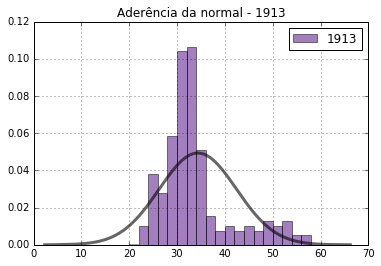

In [123]:
x = sorted(stats.norm.rvs(size = 10000, loc = 34.342494, scale = 8.085430))
plt.plot(x, stats.norm.pdf(x, loc = 34.342494, scale = 8.085430), lw = 3, alpha = 0.6, color = 'Black')
plt.title ('Aderência da normal - 1913')
df["1913"].hist(bins = range(20,60,2), color = "indigo", alpha = 0.5, normed = 1, label = '1913')
plt.legend(loc = 'best')

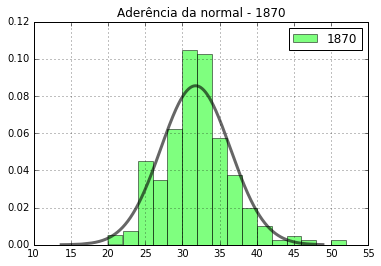

In [122]:
x = sorted(stats.norm.rvs(size = 10000, loc = 31.773984, scale = 4.665774))
plt.plot(x, stats.norm.pdf(x, loc = 31.773984, scale = 4.665774), lw = 3, alpha = 0.6, color = 'Black')
plt.title ('Aderência da normal - 1870')
df["1870"].hist(bins = range(20,55,2), color = "lime", alpha = 0.5, normed = 1, label = '1870')
plt.legend(loc = 'best')

O histograma de 1870 é o que parece melhor se adaptar à uma distribuição normal.

In [144]:
freqrel = []
for i in range (201):
    freqrel.append((i-0.5)/201)

freqnorm2010 = []
for k in df["2010"]:
    freqnorm2010.append(stats.norm.cdf (k, loc = 70.807920, scale = 8.697194))

freqnorm1913 = []
for j in df["1913"]:
    freqnorm1913.append(stats.norm.cdf (j, loc = 34.342494, scale = 8.085430))

freqnorm1870 = []
for l in df["1870"]:
    freqnorm1870.append(stats.norm.cdf (l, loc = 31.773984, scale = 4.665774))

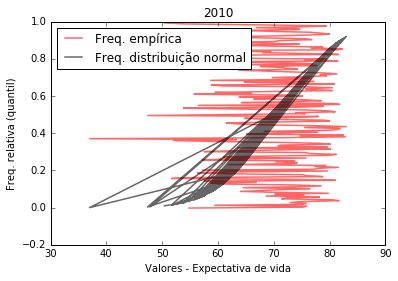

In [145]:
plt.plot(df["2010"], freqrel, lw = 1.5, color = 'red', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["2010"], freqnorm2010, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição normal')
plt.title ('2010')
plt.ylabel ('Freq. relativa (quantil)')
plt.xlabel ('Valores - Expectativa de vida')
plt.legend (loc = 'best')

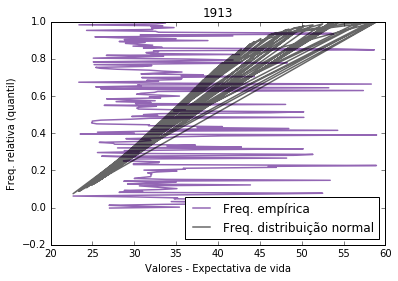

In [143]:
plt.plot(df["1913"], freqrel, lw = 1.5, color = 'indigo', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["1913"], freqnorm1913, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição normal')
plt.title ('1913')
plt.ylabel ('Freq. relativa (quantil)')
plt.xlabel ('Valores - Expectativa de vida')
plt.legend (loc = 'best')

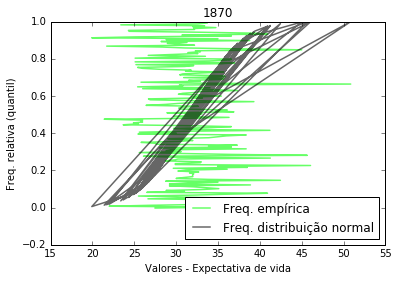

In [142]:
plt.plot(df["1870"], freqrel, lw = 1.5, color = 'lime', alpha = 0.6, label = 'Freq. empírica')
plt.plot(df["1870"], freqnorm1870, lw = 1.5, color = 'Black', alpha = 0.6, label = 'Freq. distribuição normal')
plt.title ('1870')
plt.ylabel ('Freq. relativa (quantil)')
plt.xlabel ('Valores - Expectativa de vida')
plt.legend (loc = 'best')

___
### Aderência de um modelo probabilístico assimétrico aos dados

___
### Cálculo de probabilidades a partir da distribuição normal